In [ ]:
import pandas as pd
from transformers import pipeline
import torch
import time

# Check if Apple Silicon with MPS backend is available
device = torch.device("mps") if torch.backends.mps.is_available() else torch.device("cpu")
print(f"Using device: {device}")

# Load your data
file_path =  r"/content/zcleaned reddit .csv"
reddit_data = pd.read_csv(file_path)

# Load the pre-trained sentiment-analysis pipeline with GPU support
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment", device=device)

# Function to split text into chunks of max_length
def chunk_text(text, max_length=512):
    return [text[i:i + max_length] for i in range(0, len(text), max_length)]

# Function to apply sentiment analysis safely with segment processing
def analyze_sentiment(text):
    try:
        chunks = chunk_text(text, max_length=512)
        sentiments = [sentiment_pipeline(chunk)[0]['label'] for chunk in chunks]
        # Aggregate sentiments (simple approach: take the mode, assuming it's a majority vote)
        aggregated_sentiment = max(set(sentiments), key=sentiments.count)
        return aggregated_sentiment
    except Exception as e:
        print(f"Error processing text: {text}\nError: {e}")
        return None

# Progress tracking variables
total_comments = len(reddit_data)
start_time = time.time()

# Apply sentiment analysis to the translated comments
sentiments = []
for idx, comment in enumerate(reddit_data['comment']):
    sentiment = analyze_sentiment(str(comment))
    sentiments.append(sentiment)

    # Print progress every 10 comments
    if (idx + 1) % 10 == 0:
        elapsed_time = time.time() - start_time
        print(f"Processed {idx + 1}/{total_comments} comments. Elapsed time: {elapsed_time:.2f} seconds.")

# Add sentiments to the dataframe
reddit_data['sentiment'] = sentiments

# Display the first few rows to show the sentiment analysis results
print(reddit_data.head())

# Save the results to a new CSV file
output_file_path = 'sentiment_analyzed_comments_with_text_emojis_reddit_fiat.csv'
reddit_data.to_csv(output_file_path, index=False)

print(f"Sentiment analysis complete. Results saved to {output_file_path}.")

Using device: cpu
Processed 10/10371 comments. Elapsed time: 2.81 seconds.
Processed 20/10371 comments. Elapsed time: 10.20 seconds.
Processed 30/10371 comments. Elapsed time: 12.07 seconds.
Processed 40/10371 comments. Elapsed time: 14.16 seconds.
Processed 50/10371 comments. Elapsed time: 16.86 seconds.
Processed 60/10371 comments. Elapsed time: 19.06 seconds.
Processed 70/10371 comments. Elapsed time: 20.71 seconds.
Processed 80/10371 comments. Elapsed time: 23.05 seconds.
Processed 90/10371 comments. Elapsed time: 25.31 seconds.
Processed 100/10371 comments. Elapsed time: 26.84 seconds.
Processed 110/10371 comments. Elapsed time: 29.03 seconds.
Processed 120/10371 comments. Elapsed time: 30.79 seconds.
Processed 130/10371 comments. Elapsed time: 35.27 seconds.
Processed 140/10371 comments. Elapsed time: 38.19 seconds.
Processed 150/10371 comments. Elapsed time: 40.20 seconds.
Processed 160/10371 comments. Elapsed time: 41.65 seconds.
Processed 170/10371 comments. Elapsed time: 43.8

<ipython-input-5-e7f560135f3c>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')


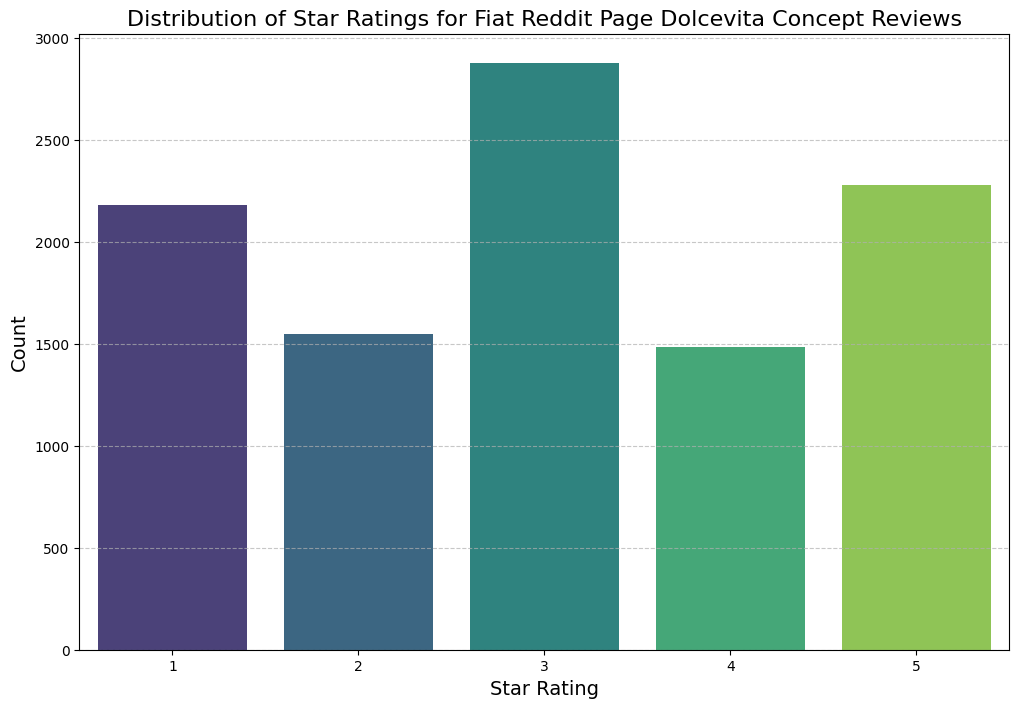

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the sentiment analyzed data
file_path =  "/content/sentiment_analyzed_comments_with_text_emojis_reddit_fiat.csv"
reddit_data = pd.read_csv(file_path)

# Extract the star ratings from the sentiment labels
reddit_data['star_rating'] = reddit_data['sentiment'].apply(lambda x: int(x.split()[0]) if 'star' in x else None)

# Count the occurrences of each star rating
rating_counts = reddit_data['star_rating'].value_counts().sort_index(ascending=False)

# Plot the results
plt.figure(figsize=(12, 8))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')

# Set plot details
plt.title('Distribution of Star Ratings for Fiat Reddit Page Dolcevita Concept Reviews', fontsize=16)
plt.xlabel('Star Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save and display the plot
plt.savefig('star_rating_distribution_with_text_emojis_fiat_Reddit.png', dpi=300)
plt.show()

<ipython-input-6-07db87884d47>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


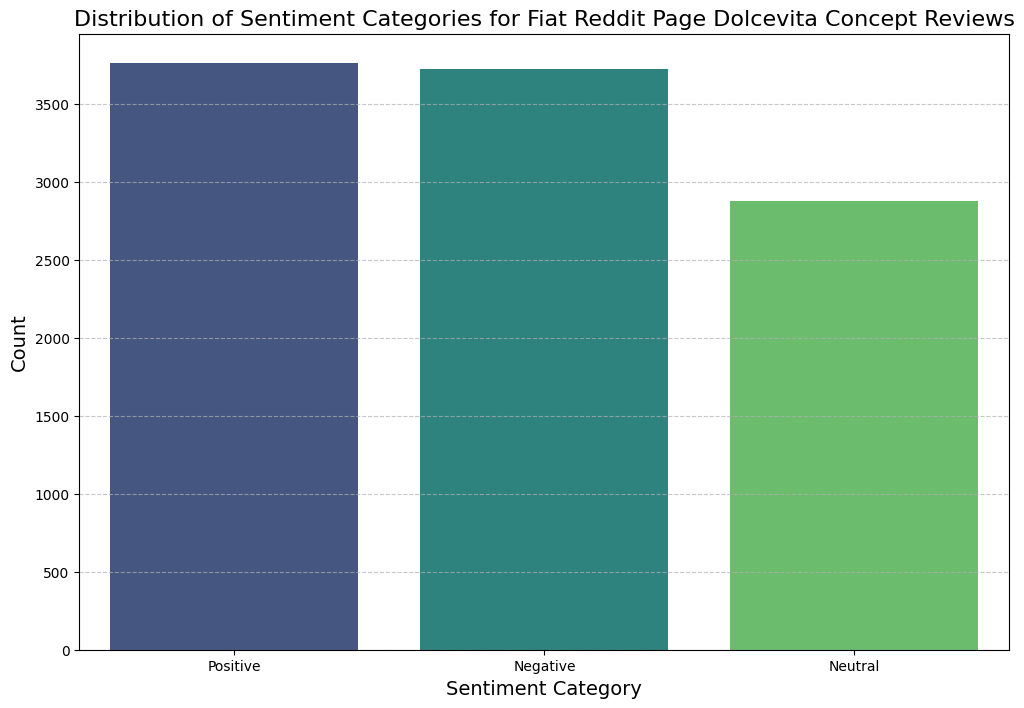

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the sentiment analyzed data
file_path = "/content/sentiment_analyzed_comments_with_text_emojis_reddit_fiat.csv"
reddit_data = pd.read_csv(file_path)

# Extract the star ratings from the sentiment labels
reddit_data['star_rating'] = reddit_data['sentiment'].apply(lambda x: int(x.split()[0]) if 'star' in x else None)

# Convert star ratings to sentiment categories
def star_to_sentiment(star_rating):
    if star_rating in [4, 5]:
        return 'Positive'
    elif star_rating == 3:
        return 'Neutral'
    elif star_rating in [1, 2]:
        return 'Negative'
    else:
        return None

reddit_data['sentiment_category'] = reddit_data['star_rating'].apply(star_to_sentiment)

# Count the occurrences of each sentiment category
sentiment_counts = reddit_data['sentiment_category'].value_counts()

# Plot the results
plt.figure(figsize=(12, 8))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')

# Set plot details
plt.title('Distribution of Sentiment Categories for Fiat Reddit Page Dolcevita Concept Reviews', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save and display the plot
plt.savefig('sentiment_category_distribution_fiat_Reddit.png', dpi=300)
plt.show()

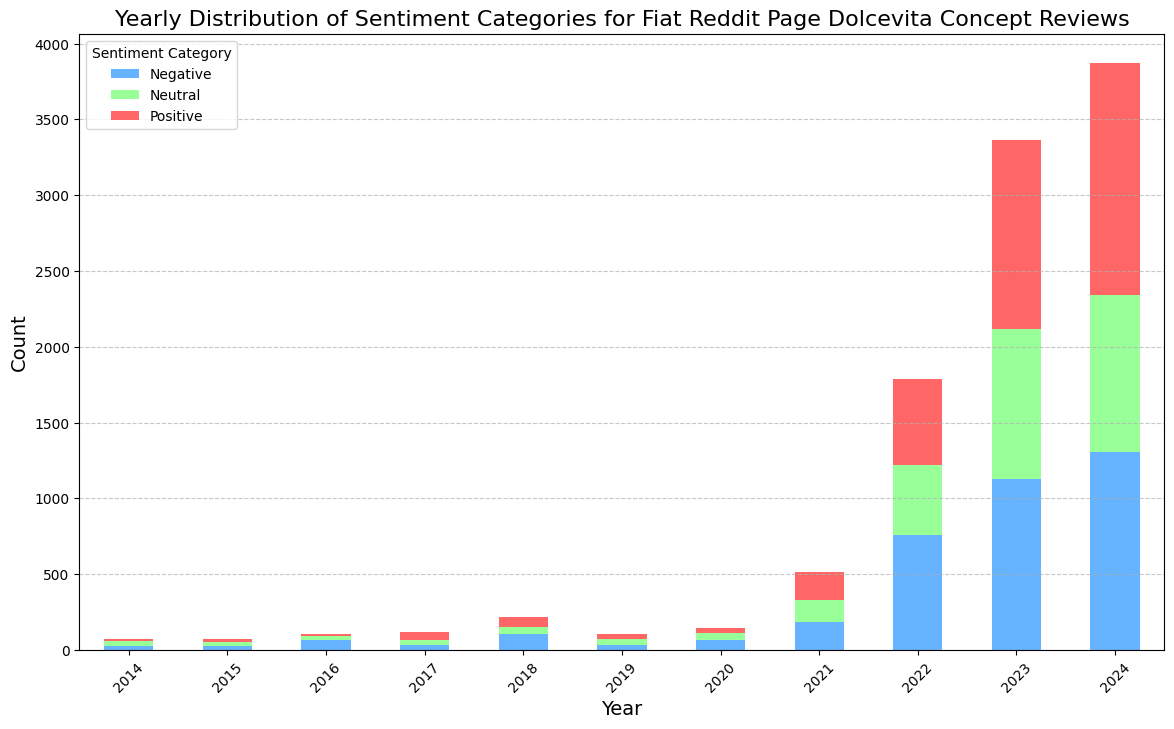

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the sentiment analyzed data
file_path = "/content/sentiment_analyzed_comments_with_text_emojis_reddit_fiat.csv"
reddit_data = pd.read_csv(file_path)

# Extract the star ratings from the sentiment labels
reddit_data['star_rating'] = reddit_data['sentiment'].apply(lambda x: int(x.split()[0]) if 'star' in x else None)

# Convert star ratings to sentiment categories
def star_to_sentiment(star_rating):
    if star_rating in [4, 5]:
        return 'Positive'
    elif star_rating == 3:
        return 'Neutral'
    elif star_rating in [1, 2]:
        return 'Negative'
    else:
        return None

reddit_data['sentiment_category'] = reddit_data['star_rating'].apply(star_to_sentiment)

# Ensure there's a 'publish_date' column and extract the year
reddit_data['year'] = pd.to_datetime(reddit_data['timestamp']).dt.year

# Group the data by year and sentiment category, then count occurrences
sentiment_by_year = reddit_data.groupby(['year', 'sentiment_category']).size().unstack().fillna(0)

# Plot the results as a stacked bar chart
sentiment_by_year.plot(kind='bar', stacked=True, figsize=(14, 8), color=['#66b3ff', '#99ff99', '#ff6666'])

# Set plot details
plt.title('Yearly Distribution of Sentiment Categories for Fiat Reddit Page Dolcevita Concept Reviews', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Sentiment Category')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save and display the plot
plt.savefig('sentiment_category_distribution_by_year_fiat_reddit.png', dpi=300)
plt.show()

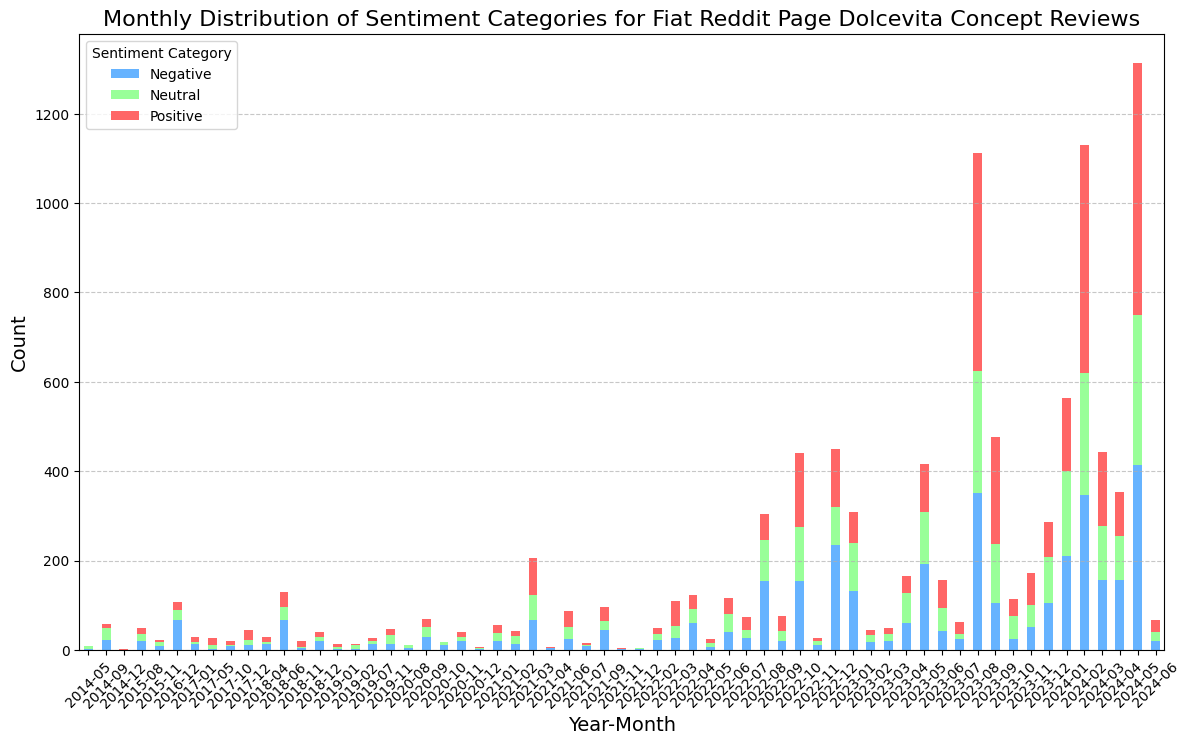

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the sentiment analyzed data
file_path = "/content/sentiment_analyzed_comments_with_text_emojis_reddit_fiat.csv"
reddit_data = pd.read_csv(file_path)

# Extract the star ratings from the sentiment labels
reddit_data['star_rating'] = reddit_data['sentiment'].apply(lambda x: int(x.split()[0]) if 'star' in x else None)

# Convert star ratings to sentiment categories
def star_to_sentiment(star_rating):
    if star_rating in [4, 5]:
        return 'Positive'
    elif star_rating == 3:
        return 'Neutral'
    elif star_rating in [1, 2]:
        return 'Negative'
    else:
        return None

reddit_data['sentiment_category'] = reddit_data['star_rating'].apply(star_to_sentiment)

# Ensure there's a 'publish_date' column and extract the year and month
reddit_data['year_month'] = pd.to_datetime(reddit_data['timestamp']).dt.to_period('M')

# Group the data by year-month and sentiment category, then count occurrences
sentiment_by_month = reddit_data.groupby(['year_month', 'sentiment_category']).size().unstack().fillna(0)

# Plot the results as a stacked bar chart
sentiment_by_month.plot(kind='bar', stacked=True, figsize=(14, 8), color=['#66b3ff', '#99ff99', '#ff6666'])

# Set plot details
plt.title('Monthly Distribution of Sentiment Categories for Fiat Reddit Page Dolcevita Concept Reviews', fontsize=16)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Sentiment Category')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save and display the plot
plt.savefig('sentiment_category_distribution_by_month_fiat_Reddit.png', dpi=300)
plt.show()

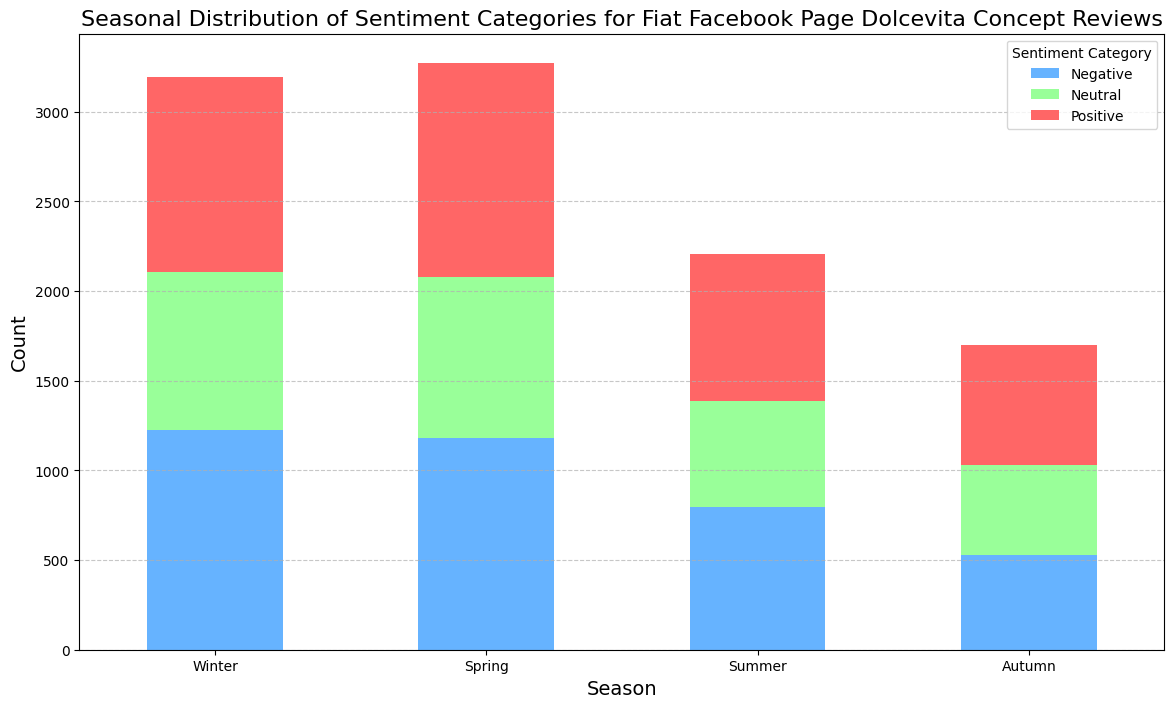

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the sentiment analyzed data
file_path = "/content/sentiment_analyzed_comments_with_text_emojis_reddit_fiat.csv"
facebook1_data = pd.read_csv(file_path)

# Extract the star ratings from the sentiment labels
facebook1_data['star_rating'] = facebook1_data['sentiment'].apply(lambda x: int(x.split()[0]) if 'star' in x else None)

# Convert star ratings to sentiment categories
def star_to_sentiment(star_rating):
    if star_rating in [4, 5]:
        return 'Positive'
    elif star_rating == 3:
        return 'Neutral'
    elif star_rating in [1, 2]:
        return 'Negative'
    else:
        return None

facebook1_data['sentiment_category'] = facebook1_data['star_rating'].apply(star_to_sentiment)

# Ensure there's a 'publish_date' column and extract the month
facebook1_data['month'] = pd.to_datetime(facebook1_data['timestamp']).dt.month

# Define the seasons based on the month
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return None

facebook1_data['season'] = facebook1_data['month'].apply(month_to_season)

# Group the data by season and sentiment category, then count occurrences
sentiment_by_season = facebook1_data.groupby(['season', 'sentiment_category']).size().unstack().fillna(0)

# Plot the results as a stacked bar chart
sentiment_by_season = sentiment_by_season.reindex(['Winter', 'Spring', 'Summer', 'Autumn'])  # Ensure seasons are in order
sentiment_by_season.plot(kind='bar', stacked=True, figsize=(14, 8), color=['#66b3ff', '#99ff99', '#ff6666'])

# Set plot details
plt.title('Seasonal Distribution of Sentiment Categories for Fiat Facebook Page Dolcevita Concept Reviews', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Sentiment Category')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save and display the plot
plt.savefig('sentiment_category_distribution_by_season_fiat_facebook.png', dpi=300)
plt.show()

VADER


In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load the dataset from the provided path
file_path = '/content/zcleaned reddit  (1).csv'
df = pd.read_csv(file_path)

# Ensure the 'comment' column is treated as a string
df['comment'] = df['comment'].astype(str)

# Apply TextBlob sentiment analysis to extract polarity and subjectivity
df[['polarity', 'subjectivity']] = df['comment'].apply(
    lambda Text: pd.Series(TextBlob(Text).sentiment))

# Initialize the SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Apply VADER sentiment analysis
for index, row in df['comment'].items():
    score = analyzer.polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']

    if neg > pos:
        df.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        df.loc[index, 'sentiment'] = "positive"
    else:
        df.loc[index, 'sentiment'] = "neutral"

    df.loc[index, 'neg'] = neg
    df.loc[index, 'neu'] = neu
    df.loc[index, 'pos'] = pos
    df.loc[index, 'compound'] = comp

# Save the updated DataFrame to a new CSV file
sentiment_file_path = 'sentiment_analyzed_comments.csv'
df.to_csv(sentiment_file_path, index=False)

# Display the first few rows to verify the changes
print(df[['comment', 'polarity', 'subjectivity', 'sentiment', 'neg', 'neu', 'pos', 'compound']].head())


                                             comment  polarity  subjectivity  \
0                      How can a car have man boobs?     0.000      0.000000   
1                        Ssangyong would like a word     0.000      0.000000   
2  IMO the Multipla is much better looking than t...     0.025      0.605556   
3                        It's very practical though.     0.200      0.300000   
4  How multiple levels of executives looked at th...     0.250      0.300000   

  sentiment    neg    neu    pos  compound  
0   neutral  0.000  1.000  0.000    0.0000  
1  positive  0.000  0.615  0.385    0.3612  
2  negative  0.269  0.572  0.160   -0.6779  
3   neutral  0.000  1.000  0.000    0.0000  
4  positive  0.000  0.802  0.198    0.6369  


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

# Define the custom sentiment analysis function
def custom_sentiment_analysis(comment):
    # Convert to lowercase for consistency
    comment = comment.lower()

    # Custom rules to catch desire or unattainable wishes
    if any(phrase in comment for phrase in ["never", "if only", "but", "pricey", "sleepy face", "could change", "expensive", "help", "you should", "even", "link", "offer", "bring back", "charges", "no arm"]):
        return "negative"

    # Custom rule for specific positive context
    if any(phrase in comment for phrase in ["want bad", "need", "give world", "very dated", "my next", "iconic", "legend", "lovely", "lovly", "last longer"]):
        return "positive"

    # Skip comments that are tagged persons only
    if 'tagged person' in comment:
        return None

    # Fallback to VADER analysis for other cases
    analyzer = SentimentIntensityAnalyzer()
    score = analyzer.polarity_scores(comment)

    if score['neg'] > score['pos']:
        return "negative"
    elif score['pos'] > score['neg']:
        return "positive"
    else:
        return "neutral"

# Load the dataset from the correct path
file_path = '/content/sentiment_analyzed_comments.csv'  # Adjust this path as needed in your local environment
df = pd.read_csv(file_path)

# Ensure the 'comment' column is treated as a string for analysis
df['comment'] = df['comment'].astype(str)

# Apply custom sentiment analysis, ignoring 'tagged person' comments
df['custom_sentiment'] = df['comment'].apply(custom_sentiment_analysis)

# Check the results
print(df[['comment', 'sentiment', 'custom_sentiment']].head())

# Save the updated DataFrame to a new CSV file
sentiment_file_path = '2sentiment_analyzed_comments_customized.csv'  # Adjust this path as needed in your local environment
df.to_csv(sentiment_file_path, index=False)


                                             comment sentiment  \
0                      How can a car have man boobs?   neutral   
1                        Ssangyong would like a word  positive   
2  IMO the Multipla is much better looking than t...  negative   
3                        It's very practical though.   neutral   
4  How multiple levels of executives looked at th...  positive   

  custom_sentiment  
0          neutral  
1         positive  
2         negative  
3          neutral  
4         negative  


In [ ]:
import pandas as pd

# Read the updated DataFrame to a new CSV file
df = pd.read_csv(r"/content/2sentiment_analyzed_comments_customized.csv")

# Calculate the total number of positive, negative, and neutral comments
total_pos = df['custom_sentiment'].value_counts().get("positive", 0)
total_neg = df['custom_sentiment'].value_counts().get("negative", 0)
total_neu = df['custom_sentiment'].value_counts().get("neutral", 0)
total_comments = len(df)

# Print the percentages of each sentiment category
print("Total Positive Comments % : {:.2f}".format((total_pos / total_comments) * 100))
print("Total Negative Comments % : {:.2f}".format((total_neg / total_comments) * 100))
print("Total Neutral Comments % : {:.2f}".format((total_neu / total_comments) * 100))

Total Positive Comments % : 34.04
Total Negative Comments % : 45.89
Total Neutral Comments % : 20.08


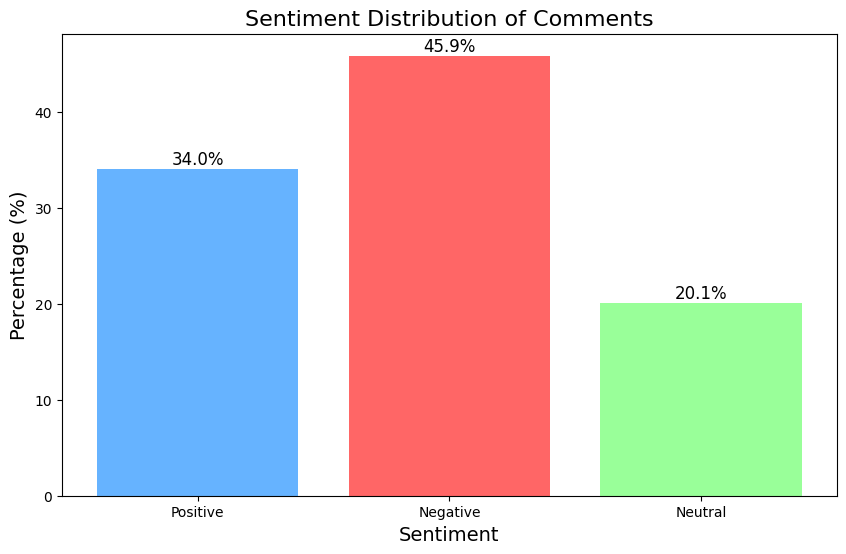

In [ ]:
import matplotlib.pyplot as plt

# Calculate the total number of each sentiment
total_pos = len(df.loc[df['custom_sentiment'] == "positive"])
total_neg = len(df.loc[df['custom_sentiment'] == "negative"])
total_neu = len(df.loc[df['custom_sentiment'] == "neutral"])
total_comments = len(df)

# Labels and colors
mylabels = ["Positive", "Negative", "Neutral"]
mycolors = ["#66b3ff", "#ff6666", "#99ff99"]  # Light blue, light red, light green

# Calculate percentages
percentages = [total_pos / total_comments * 100,
               total_neg / total_comments * 100,
               total_neu / total_comments * 100]

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(mylabels, percentages, color=mycolors)

# Add title and labels
plt.title('Sentiment Distribution of Comments', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)

# Display the percentage values on the bars
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 0.5, f'{percentage:.1f}%', ha='center', fontsize=12)

# Show the bar chart
plt.show()

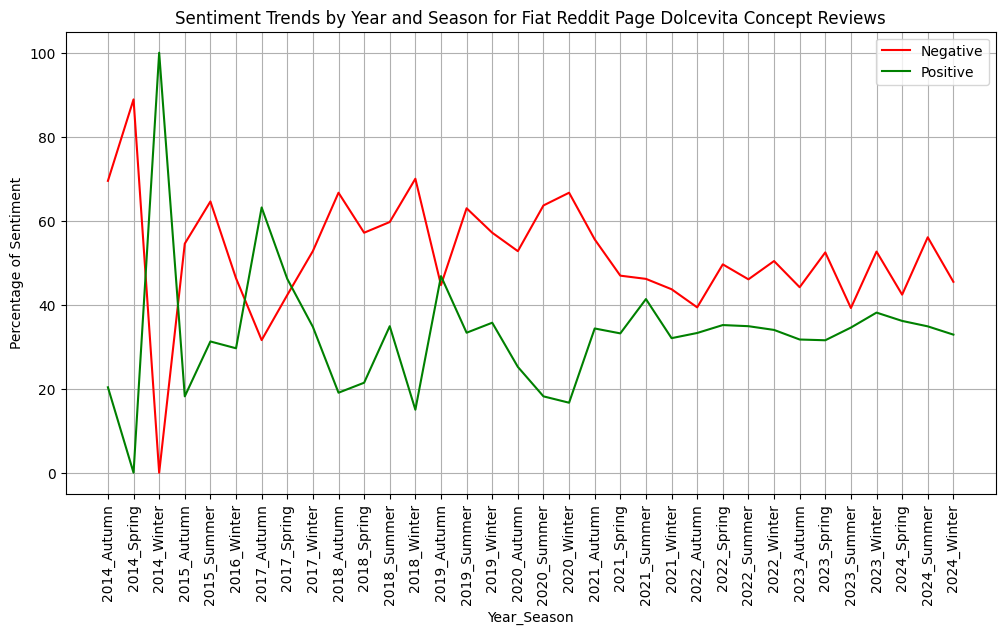

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
sentiment_file_path = '/content/2sentiment_analyzed_comments_customized.csv'
reddit_data = pd.read_csv(sentiment_file_path)

# Extract the year and month from the 'timestamp' column
reddit_data['year'] = pd.to_datetime(reddit_data['timestamp']).dt.year
reddit_data['month'] = pd.to_datetime(reddit_data['timestamp']).dt.month

# Define the seasons based on the month
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return None

# Apply the function to get the season
reddit_data['season'] = reddit_data['month'].apply(month_to_season)

# Combine year and season into a single column for grouping
reddit_data['year_season'] = reddit_data['year'].astype(str) + "_" + reddit_data['season']

# Initialize lists to store sentiment percentages per season-year
pos_list = []
neg_list = []

# Loop through each unique year-season
for yseason in reddit_data['year_season'].unique():
    temp = reddit_data[reddit_data['year_season'] == yseason]
    positive_temp = temp[temp['custom_sentiment'] == 'positive']
    negative_temp = temp[temp['custom_sentiment'] == 'negative']

    pos_list.append((positive_temp.shape[0] / temp.shape[0]) * 100)
    neg_list.append((negative_temp.shape[0] / temp.shape[0]) * 100)

# Sort the lists by year_season
neg_list = [x for _, x in sorted(zip(reddit_data['year_season'].unique(), neg_list))]
pos_list = [x for _, x in sorted(zip(reddit_data['year_season'].unique(), pos_list))]
x_labels = sorted(reddit_data['year_season'].unique())

# Plot the sentiment trends over time
plt.figure(figsize=(12, 6))
plt.plot(x_labels, neg_list, label='Negative', color='red')
plt.plot(x_labels, pos_list, label='Positive', color='green')
plt.xticks(rotation=90)
plt.xlabel('Year_Season')
plt.ylabel('Percentage of Sentiment')
plt.title('Sentiment Trends by Year and Season for Fiat Reddit Page Dolcevita Concept Reviews')
plt.legend()
plt.grid(True)

# Save and display the plot
plt.savefig('sentiment_trends_by_year_season.png', dpi=300)
plt.show()


ROBERTA MODEL


In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax


In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
import pandas as pd
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from scipy.special import softmax
from tqdm import tqdm

# Load the pre-trained model and tokenizer
tokenizer = RobertaTokenizer.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment')
model = RobertaForSequenceClassification.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment')

# Force model to run on CPU
device = torch.device('cpu')
model.to(device)

# Load the new dataset from the uploaded file
new_dataset = '/content/zcleaned reddit  (1).csv'
df = pd.read_csv(new_dataset)

# Ensure the 'comment' column is treated as a string
df['comment'] = df['comment'].astype(str)

# Function to calculate sentiment using Roberta with truncation and padding
def get_roberta_sentiment(text):
    encoded_text = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=512)
    encoded_text = {k: v.to(device) for k, v in encoded_text.items()}  # Ensure tensors are on the CPU
    output = model(**encoded_text)
    scores = output.logits[0].detach().numpy()
    scores = softmax(scores)
    return {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }

# Apply the sentiment analysis to each row in the dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['comment']
    myid = i  # Use the index as a unique identifier
    res[myid] = get_roberta_sentiment(text)

# Convert results to a DataFrame
roberta_df = pd.DataFrame(res).T.reset_index().rename(columns={'index': 'Index'})

# Determine the sentiment based on the highest score
roberta_df['sentiment'] = roberta_df[['roberta_neg', 'roberta_neu', 'roberta_pos']].idxmax(axis=1)
roberta_df['sentiment'] = roberta_df['sentiment'].map({
    'roberta_neg': 'Negative',
    'roberta_neu': 'Neutral',
    'roberta_pos': 'Positive'
})

# Merge the Roberta sentiment scores with the original dataset
df = df.reset_index().rename(columns={'index': 'Index'})  # Reset index to use as 'Index' column
merged_df = df.merge(roberta_df, on='Index', how='left')

# Save the merged DataFrame to a new CSV file
output_file_path = 'sentiment_with_roberta_scores_and_labels.csv'
merged_df.to_csv(output_file_path, index=False)

print(f"Sentiment scores with Roberta model have been saved to {output_file_path}")


100%|██████████| 10371/10371 [44:16<00:00,  3.90it/s]


Sentiment scores with Roberta model have been saved to sentiment_with_roberta_scores_and_labels.csv


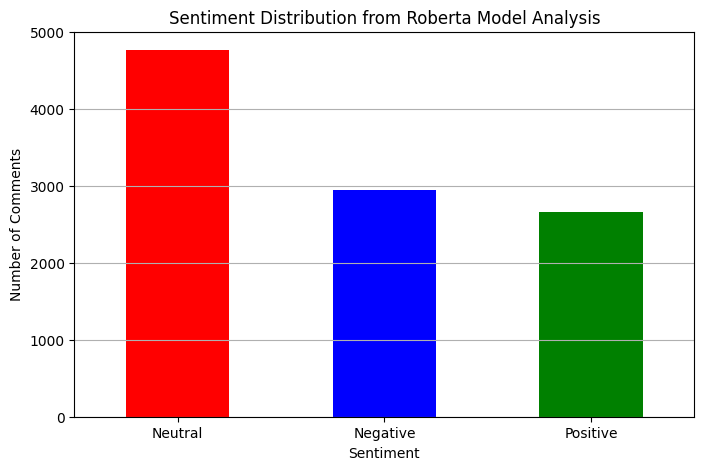

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the sentiment analysis results from the provided file
sentiment_file_path = '/content/sentiment_with_roberta_scores_and_labels.csv'
df = pd.read_csv(sentiment_file_path)

# Count the number of each sentiment
sentiment_counts = df['sentiment'].value_counts()

# Plot the sentiment distribution
plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['red', 'blue', 'green'])
plt.title('Sentiment Distribution from Roberta Model Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Save and display the plot
plt.savefig('/sentiment_distribution_plot.png', dpi=300)
plt.show()


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

# Load datasets generated from each model
roberta_df = pd.read_csv('sentiment_with_roberta_scores_and_labels.csv')
vader_df = pd.read_csv('2sentiment_analyzed_comments_customized.csv')
star_df = pd.read_csv('sentiment_analyzed_comments.csv')

# Rename columns to standardize
roberta_df = roberta_df.rename(columns={'sentiment': 'roberta_sentiment'})
vader_df = vader_df.rename(columns={'custom_sentiment': 'vader_sentiment'})
star_df = star_df.rename(columns={'sentiment': 'star_sentiment'})

# Merge datasets on the 'comment' column
merged_df = pd.merge(roberta_df[['comment', 'roberta_sentiment']],
                     vader_df[['comment', 'vader_sentiment']], on='comment', how='inner')
merged_df = pd.merge(merged_df, star_df[['comment', 'star_sentiment']], on='comment', how='inner')

# Define a function to calculate the consensus sentiment (majority voting)
def consensus_sentiment(row):
    sentiments = [row['roberta_sentiment'], row['vader_sentiment'], row['star_sentiment']]
    return max(set(sentiments), key=sentiments.count)

# Apply the consensus function to determine the 'true' sentiment
merged_df['true_sentiment'] = merged_df.apply(consensus_sentiment, axis=1)

# Function to evaluate model performance
def evaluate_model(true_labels, predictions, model_name):
    accuracy = accuracy_score(true_labels, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predictions, average='weighted')
    cm = confusion_matrix(true_labels, predictions)

    print(f"Performance metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print(f"Confusion Matrix:\n{cm}\n")

# Evaluate each model against the consensus 'true' sentiment
evaluate_model(merged_df['true_sentiment'], merged_df['roberta_sentiment'], 'Roberta')
evaluate_model(merged_df['true_sentiment'], merged_df['vader_sentiment'], 'VADER')
evaluate_model(merged_df['true_sentiment'], merged_df['star_sentiment'], 'Star Rating')


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Performance metrics for Roberta:
Accuracy: 0.14
Precision: 0.02
Recall: 0.14
F1-Score: 0.04
Confusion Matrix:
[[ 924    0    0    0    0    0]
 [   0 2215    0    0    0    0]
 [   0    0    0    0    0    0]
 [2912 1368 1634    0    0    0]
 [ 719 3175  249    0    0    0]
 [1016 5572 2479    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Performance metrics for VADER:
Accuracy: 0.86
Precision: 0.76
Recall: 0.86
F1-Score: 0.80
Confusion Matrix:
[[   0    0  814    0  110]
 [   0    0 2086    1  128]
 [   0    0 5911    0    3]
 [   0    0   46 4091    6]
 [   0    0    0    0 9067]]

Performance metrics for Star Rating:
Accuracy: 0.80
Precision: 0.71
Recall: 0.80
F1-Score: 0.74
Confusion Matrix:
[[   0    0   98  118  708]
 [   0    0   81  351 1783]
 [   0    0 4526    0 1388]
 [   0    0    0 4143    0]
 [   0    0    0    0 9067]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

# Load datasets generated from each model
roberta_df = pd.read_csv('sentiment_with_roberta_scores_and_labels.csv')
vader_df = pd.read_csv('2sentiment_analyzed_comments_customized.csv')
star_df = pd.read_csv('sentiment_analyzed_comments.csv')

# Rename columns to standardize
roberta_df = roberta_df.rename(columns={'sentiment': 'roberta_sentiment'})
vader_df = vader_df.rename(columns={'custom_sentiment': 'vader_sentiment'})
star_df = star_df.rename(columns={'sentiment': 'star_sentiment'})

# Merge datasets on the 'comment' column
merged_df = pd.merge(roberta_df[['comment', 'roberta_sentiment']],
                     vader_df[['comment', 'vader_sentiment']], on='comment', how='inner')
merged_df = pd.merge(merged_df, star_df[['comment', 'star_sentiment']], on='comment', how='inner')

# Define a function to calculate the consensus sentiment (majority voting)
def consensus_sentiment(row):
    sentiments = [row['roberta_sentiment'], row['vader_sentiment'], row['star_sentiment']]
    return max(set(sentiments), key=sentiments.count)

# Apply the consensus function to determine the 'true' sentiment
merged_df['true_sentiment'] = merged_df.apply(consensus_sentiment, axis=1)

# Print the distribution of predictions
print("Distribution of Roberta Sentiments:\n", merged_df['roberta_sentiment'].value_counts())
print("Distribution of VADER Sentiments:\n", merged_df['vader_sentiment'].value_counts())
print("Distribution of Star Rating Sentiments:\n", merged_df['star_sentiment'].value_counts())

# Function to evaluate model performance
def evaluate_model(true_labels, predictions, model_name):
    accuracy = accuracy_score(true_labels, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predictions, average='weighted')
    cm = confusion_matrix(true_labels, predictions)

    print(f"\nPerformance metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print(f"Confusion Matrix:\n{cm}\n")

# Evaluate each model against the consensus 'true' sentiment
evaluate_model(merged_df['true_sentiment'], merged_df['roberta_sentiment'], 'Roberta')
evaluate_model(merged_df['true_sentiment'], merged_df['vader_sentiment'], 'VADER')
evaluate_model(merged_df['true_sentiment'], merged_df['star_sentiment'], 'Star Rating')


Distribution of Roberta Sentiments:
 roberta_sentiment
Neutral     12330
Negative     5571
Positive     4362
Name: count, dtype: int64
Distribution of VADER Sentiments:
 vader_sentiment
positive    9314
negative    8857
neutral     4092
Name: count, dtype: int64
Distribution of Star Rating Sentiments:
 star_sentiment
positive    12946
negative     4705
neutral      4612
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Performance metrics for Roberta:
Accuracy: 0.14
Precision: 0.02
Recall: 0.14
F1-Score: 0.04
Confusion Matrix:
[[ 924    0    0    0    0    0]
 [   0 2215    0    0    0    0]
 [   0    0    0    0    0    0]
 [2912 1368 1634    0    0    0]
 [ 719 3175  249    0    0    0]
 [1016 5572 2479    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Performance metrics for VADER:
Accuracy: 0.86
Precision: 0.76
Recall: 0.86
F1-Score: 0.80
Confusion Matrix:
[[   0    0  814    0  110]
 [   0    0 2086    1  128]
 [   0    0 5911    0    3]
 [   0    0   46 4091    6]
 [   0    0    0    0 9067]]


Performance metrics for Star Rating:
Accuracy: 0.80
Precision: 0.71
Recall: 0.80
F1-Score: 0.74
Confusion Matrix:
[[   0    0   98  118  708]
 [   0    0   81  351 1783]
 [   0    0 4526    0 1388]
 [   0    0    0 4143    0]
 [   0    0    0    0 9067]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

# Load datasets generated from each model
roberta_df = pd.read_csv('sentiment_with_roberta_scores_and_labels.csv')
vader_df = pd.read_csv('2sentiment_analyzed_comments_customized.csv')
star_df = pd.read_csv('sentiment_analyzed_comments.csv')

# Rename columns to standardize
roberta_df = roberta_df.rename(columns={'sentiment': 'roberta_sentiment'})
vader_df = vader_df.rename(columns={'custom_sentiment': 'vader_sentiment'})
star_df = star_df.rename(columns={'sentiment': 'star_sentiment'})

# Merge datasets on the 'comment' column
merged_df = pd.merge(roberta_df[['comment', 'roberta_sentiment']],
                     vader_df[['comment', 'vader_sentiment']], on='comment', how='inner')
merged_df = pd.merge(merged_df, star_df[['comment', 'star_sentiment']], on='comment', how='inner')

# Define a function to calculate the consensus sentiment (majority voting)
def consensus_sentiment(row):
    sentiments = [row['roberta_sentiment'], row['vader_sentiment'], row['star_sentiment']]
    return max(set(sentiments), key=sentiments.count)

# Apply the consensus function to determine the 'true' sentiment
merged_df['true_sentiment'] = merged_df.apply(consensus_sentiment, axis=1)

# Print the distribution of predictions
print("Distribution of Roberta Sentiments:\n", merged_df['roberta_sentiment'].value_counts())
print("Distribution of VADER Sentiments:\n", merged_df['vader_sentiment'].value_counts())
print("Distribution of Star Rating Sentiments:\n", merged_df['star_sentiment'].value_counts())

# Function to evaluate model performance with zero_division to handle undefined metrics
def evaluate_model(true_labels, predictions, model_name):
    accuracy = accuracy_score(true_labels, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predictions, average='weighted', zero_division=0)
    cm = confusion_matrix(true_labels, predictions)

    print(f"\nPerformance metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print(f"Confusion Matrix:\n{cm}\n")

# Evaluate each model against the consensus 'true' sentiment
evaluate_model(merged_df['true_sentiment'], merged_df['roberta_sentiment'], 'Roberta')
evaluate_model(merged_df['true_sentiment'], merged_df['vader_sentiment'], 'VADER')
evaluate_model(merged_df['true_sentiment'], merged_df['star_sentiment'], 'Star Rating')


Distribution of Roberta Sentiments:
 roberta_sentiment
Neutral     12330
Negative     5571
Positive     4362
Name: count, dtype: int64
Distribution of VADER Sentiments:
 vader_sentiment
positive    9314
negative    8857
neutral     4092
Name: count, dtype: int64
Distribution of Star Rating Sentiments:
 star_sentiment
positive    12946
negative     4705
neutral      4612
Name: count, dtype: int64

Performance metrics for Roberta:
Accuracy: 0.14
Precision: 0.02
Recall: 0.14
F1-Score: 0.04
Confusion Matrix:
[[ 924    0    0    0    0    0]
 [   0 2215    0    0    0    0]
 [   0    0    0    0    0    0]
 [2912 1368 1634    0    0    0]
 [ 719 3175  249    0    0    0]
 [1016 5572 2479    0    0    0]]


Performance metrics for VADER:
Accuracy: 0.86
Precision: 0.76
Recall: 0.86
F1-Score: 0.80
Confusion Matrix:
[[   0    0  814    0  110]
 [   0    0 2086    1  128]
 [   0    0 5911    0    3]
 [   0    0   46 4091    6]
 [   0    0    0    0 9067]]


Performance metrics for Star Rating:
A

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/fiat_uk_perceptions.csv'
fiat_data = pd.read_csv(file_path)

# Group by the 'title' and count the number of comments per post
comments_per_post = fiat_data.groupby('title').size()

# Convert to DataFrame for better visibility
comments_per_post_df = comments_per_post.reset_index(name='comment_count')

# Optionally, sort the DataFrame by the number of comments to see the most discussed posts
sorted_comments = comments_per_post_df.sort_values(by='comment_count', ascending=False)

# Display the sorted DataFrame
print(sorted_comments.head())  # Adjust the number inside head() to display more or fewer rows


                                                 title  comment_count
204  Which cars from the last 25yrs do you think wi...            760
160  The world's ugliest ever car is the Fiat Multi...            565
43               Dead car model that you would revive?            440
98   Guilty pleasure cars that you will admit to li...            438
159       Talk me out of buying this high mileage 118d            332


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/fiat_uk_perceptions.csv'
fiat_data = pd.read_csv(file_path)

# Group by the 'title' and count the number of comments and average comment length per post
analysis = fiat_data.groupby('title').agg({
    'comment': ['size', lambda x: x.str.len().mean()]
}).reset_index()

# Rename columns for clarity
analysis.columns = ['title', 'comment_count', 'average_comment_length']

# Sort by the number of comments to see the most discussed posts
sorted_analysis = analysis.sort_values(by='comment_count', ascending=False)

# Save the output to a new CSV file
output_path = 'engagement_analysis.csv'
sorted_analysis.to_csv(output_path, index=False)

# Display the DataFrame head
print(sorted_analysis.head())


                                                 title  comment_count  \
204  Which cars from the last 25yrs do you think wi...            760   
160  The world's ugliest ever car is the Fiat Multi...            565   
43               Dead car model that you would revive?            440   
98   Guilty pleasure cars that you will admit to li...            438   
159       Talk me out of buying this high mileage 118d            332   

     average_comment_length  
204              128.950000  
160              120.552212  
43               120.918182  
98               143.200913  
159              135.638554  


In [ ]:
!pip install praw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 4.7 MB/s eta 0:00:00


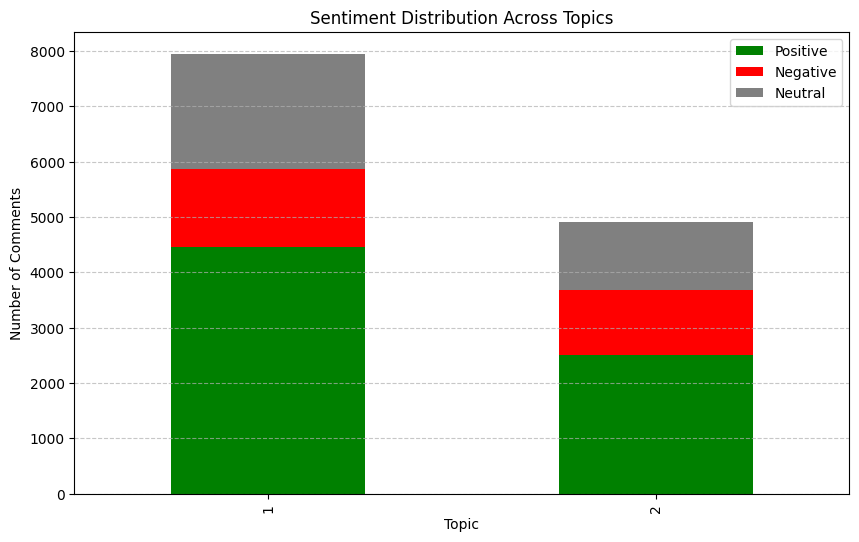

In [5]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from textblob import TextBlob

# List of topics
topics = [1, 2]

# Dictionary to store sentiment data
sentiment_counts = {topic: {'positive': 0, 'negative': 0, 'neutral': 0} for topic in topics}

# Iterate through each topic file
for topic_num in topics:
    file_path = f'/content/fiat_uk_comments_topic_{topic_num}_comments.csv'

    if os.path.exists(file_path):
        topic_df = pd.read_csv(file_path)

        # Ensure comments are strings and handle missing data
        topic_df['Comment'] = topic_df['Comment'].astype(str)

        # Analyze sentiment for each comment
        for comment in topic_df['Comment']:
            analysis = TextBlob(comment)
            if analysis.sentiment.polarity > 0:
                sentiment_counts[topic_num]['positive'] += 1
            elif analysis.sentiment.polarity < 0:
                sentiment_counts[topic_num]['negative'] += 1
            else:
                sentiment_counts[topic_num]['neutral'] += 1
    else:
        print(f'File for topic {topic_num} not found.')

# Prepare data for visualization
data = {'Topic': [], 'Positive': [], 'Negative': [], 'Neutral': []}
for topic, sentiments in sentiment_counts.items():
    data['Topic'].append(topic)
    data['Positive'].append(sentiments['positive'])
    data['Negative'].append(sentiments['negative'])
    data['Neutral'].append(sentiments['neutral'])

# Plotting the sentiment distribution
df = pd.DataFrame(data)
df.set_index('Topic', inplace=True)
df.plot(kind='bar', stacked=True, figsize=(10, 6), color=['green', 'red', 'gray'])
plt.xlabel('Topic')
plt.ylabel('Number of Comments')
plt.title('Sentiment Distribution Across Topics')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

